In [38]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, chisquare
import matplotlib.pyplot as plt
import json  # For formatted output

In [39]:
# **1. Load lotto data**
lotto_data = pd.read_csv("lotto_data_1_to_1148.csv")
lotto_data['Numbers'] = lotto_data['Numbers'].apply(lambda x: eval(x) if isinstance(x, str) else x)
expanded_numbers = lotto_data['Numbers'].explode()  # Expand lists into individual rows
expanded_numbers = expanded_numbers.dropna().astype(int)

In [40]:
# **2. Observed frequencies**
observed_frequencies = expanded_numbers.value_counts().sort_index()

In [41]:
# **3. Define the winning numbers for the 1149th round**
new_numbers = [8, 15, 19, 21, 32, 36]
new_frequencies = pd.Series(new_numbers).value_counts().reindex(observed_frequencies.index, fill_value=0)

In [42]:
# **4. Perform Chi-square test**
f_exp_adjusted = observed_frequencies * (new_frequencies.sum() / observed_frequencies.sum())
chi2, p_value = chisquare(f_obs=new_frequencies, f_exp=f_exp_adjusted)

In [43]:
# **5. Compute Poisson probabilities**
lambda_estimate = observed_frequencies.mean()
poisson_probs = poisson.pmf(new_frequencies, mu=lambda_estimate)

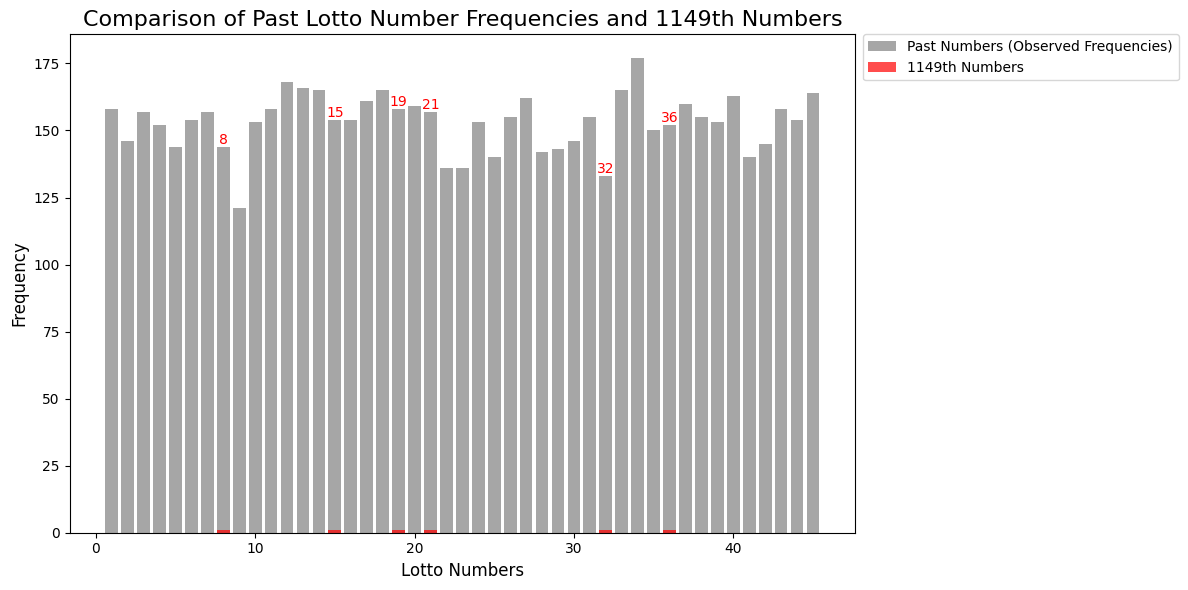

In [50]:
# **6. Visualize the graph (legend outside the plot)**
plt.figure(figsize=(12, 6))

# Plot past numbers with a label for legend
plt.bar(
    observed_frequencies.index, observed_frequencies,
    color='gray', alpha=0.7, label='Past Numbers (Observed Frequencies)'
)

# Plot 1149th numbers with a label for legend
plt.bar(
    new_frequencies.index, new_frequencies,
    color='red', alpha=0.7, label='1149th Numbers'
)

# Add numbers on top of the bars for 1149th numbers
for num, freq in zip(new_frequencies.index, new_frequencies):
    if freq > 0:  # Only label non-zero frequencies
        plt.text(
            num, observed_frequencies[num] + freq,
            f"{num}", color='red', fontsize=10, ha='center'
        )

# Add title and axis labels
plt.title('Comparison of Past Lotto Number Frequencies and 1149th Numbers', fontsize=16)
plt.xlabel('Lotto Numbers', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0)  # Place legend outside

# Adjust layout to include the legend
plt.tight_layout()

# Save the graph
plt.savefig('lotto_analysis_legend_outside.png', bbox_inches='tight')  # Save with adjusted layout
plt.show()

In [51]:
# **7. Format and print results**
formatted_results = {
    "Chi-square Statistic": round(float(chi2), 2),
    "p-value": round(float(p_value), 4),
    "Poisson Probabilities": {
        num: round(float(prob), 10) for num, prob in zip(new_numbers, poisson_probs)
    },
}

In [52]:
print("Formatted Statistical Analysis Results:")
print(json.dumps(formatted_results, indent=4))  # Pretty-printed JSON output

Formatted Statistical Analysis Results:
{
    "Chi-square Statistic": 40.19,
    "p-value": 0.6357,
    "Poisson Probabilities": {
        "8": 0.0,
        "15": 0.0,
        "19": 0.0,
        "21": 0.0,
        "32": 0.0,
        "36": 0.0
    }
}
